In [115]:
import mne
import pandas as pd
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib as mpl
import matplotlib.colors
import plotly.express as px
import plotly.graph_objects as go

In [2]:
%matplotlib inline


In [3]:
from matplotlib import animation, rc
from IPython.display import HTML

In [4]:
# raw = mne.io.read_raw_eeglab('927/fixica.set', preload=True)
raw = mne.io.read_raw_eeglab('927/fixica.set')

Reading C:\Users\Yiki\Documents\UBC\MDS\Homework\capstone\927\fixica.fdt


<ipython-input-4-dfb39bdf8143>:2: RuntimeWarning: Data file name in EEG.data (927 fix ica correct.fdt) is incorrect, the file name must have changed on disk, using the correct file name (fixica.fdt).
  raw = mne.io.read_raw_eeglab('927/fixica.set')


In [118]:
mat = scipy.io.loadmat("927/impact locations.mat")
mat['elecmax1']

array([[ 1557256,  1877365,  2103082,  2342349,  2584772,  2831824,
         3253750,  3451984,  3714691,  3946025,  4191526,  4691311,
         4939795,  5186986,  5440822,  5674061,  6119883,  6405042,
         6693612,  6916783,  7147524,  7396114,  7636402,  7948417,
         8165085,  8418575,  8656274,  8978327,  9245645,  9493617,
         9735959,  9971239, 10222451]])

In [119]:
mat['elecmax1'].shape

(1, 33)

Fitting ICA to data using 19 channels (please be patient, this may take a while)


<ipython-input-73-762b244d8acf>:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 19 components
Fitting ICA took 415.7s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
2707 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
2707 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


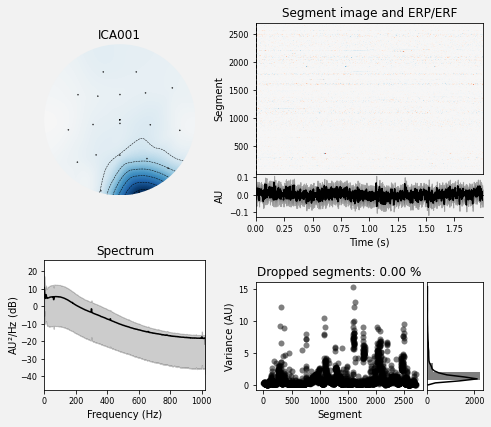

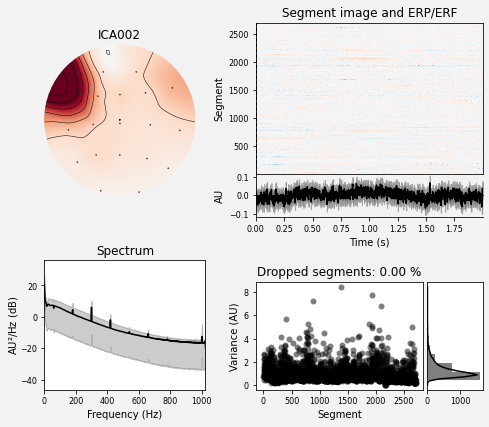

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [73]:
# # set up and fit the ICA
# ica = mne.preprocessing.ICA(n_components=19, random_state=97, max_iter=800)
# ica.fit(raw)
# ica.exclude = [1, 2]  # details on how we picked these are omitted here
# ica.plot_properties(raw, picks=ica.exclude)

In [40]:
# info = mne.create_info(['STI'], raw.info['sfreq'], ['stim'])
# stim_raw = mne.io.RawArray(stim_data, info)
# raw.add_channels([stim_raw], force_update_info=True)

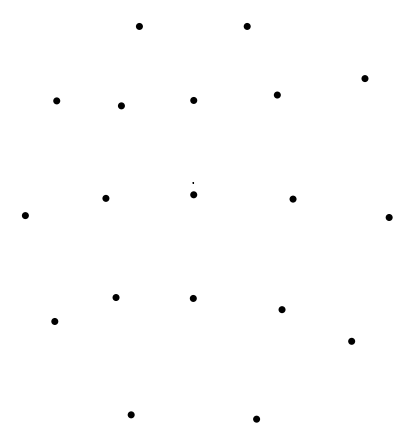

In [38]:
raw.plot_sensors();

In [5]:
channel_dict = raw.get_montage().get_positions()['ch_pos']
channel_dict

OrderedDict([('Fp1', array([-21.90840681,  63.62663337,  -5.28424423])),
             ('Fp2', array([21.90810621, 63.62576037, -5.29598896])),
             ('F7', array([-53.2317449 ,  31.98485919,  -8.63945123])),
             ('T3', array([-66.84435278, -12.99322596,  -7.43361158])),
             ('T5', array([-58.3900796 , -58.3900796 ,  -1.98927356])),
             ('F3', array([-39.98550918,  42.8792089 ,  33.85      ])),
             ('C3', array([-52.68761775,  -9.29024856,  51.84550335])),
             ('P3', array([-43.12261362, -63.93190381,  45.42468348])),
             ('Fz', array([ 0.26592806, 50.78805506, 57.60853015])),
             ('Cz', array([ 0.27739786, -7.94363529, 87.33906176])),
             ('Pz',
              array([ 8.58366287e-15, -7.00909264e+01,  7.13250449e+01])),
             ('F4', array([46.26553757, 48.41411956, 36.35949753])),
             ('C4', array([59.823882  , -9.6893546 , 56.71172322])),
             ('P4', array([ 49.47175167, -70.65298354,

In [6]:
raw_data = raw.get_data()

In [7]:
raw_data

array([[ 5.24996710e-06,  5.27808857e-06, -7.04737604e-07, ...,
         2.61888409e-06,  3.35831451e-06,  4.44953203e-06],
       [ 6.65596962e-06,  6.69543600e-06, -2.40034628e-06, ...,
         3.42215562e-06,  3.45109987e-06,  4.16558886e-06],
       [-4.43447542e-06, -5.00016403e-06,  9.22408581e-06, ...,
        -2.65527987e-06,  1.09587419e-06,  7.79431868e-06],
       ...,
       [ 1.80216064e-05,  1.79398098e-05, -2.91482091e-06, ...,
         3.32699680e-06,  3.22835636e-06,  8.45246792e-07],
       [ 4.76732016e-06,  4.68454790e-06,  2.05369473e-07, ...,
         2.95823932e-06,  2.78550887e-06,  1.09791934e-06],
       [ 1.83660278e-05,  1.81766129e-05, -7.27486253e-07, ...,
         1.60045929e-05,  8.31641293e-06, -3.04889679e-08]])

In [8]:
plot_df = raw.to_data_frame()

In [6]:
# mne.find_events(raw)

In [14]:
# mne.viz.plot_events(events, sfreq=raw.info['sfreq'], first_samp=raw.first_samp);

In [15]:
# epochs = mne.Epochs(raw, events,tmin=-0.2, tmax=0.5,preload=True)

Effective window size : 1.000 (s)


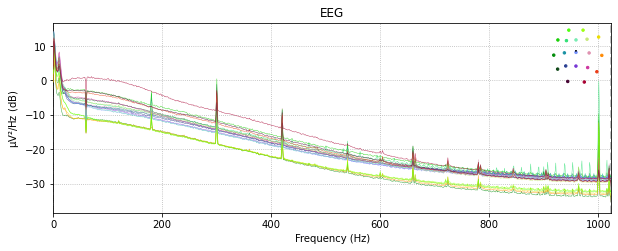

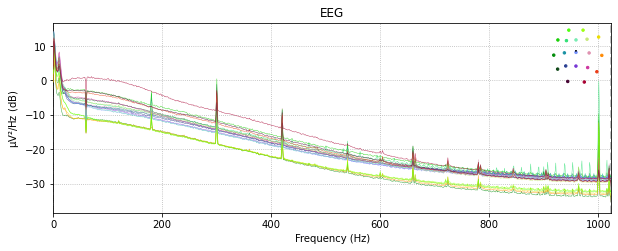

In [31]:
raw.plot_psd()

In [32]:
raw.describe()

<RawEEGLAB | fixica.fdt, 19 x 11088489 (5414.3 s), ~30 kB, data not loaded>
ch  name  type  unit       min        Q1    median        Q3       max
 0  Fp1   EEG   µV      -80.25     -5.06     -0.11      4.90     82.76
 1  Fp2   EEG   µV      -78.40     -4.97     -0.09      4.83     87.40
 2  F7    EEG   µV     -272.26     -7.10     -0.14      6.80    233.31
 3  T3    EEG   µV      -86.76     -3.80     -0.18      3.49     90.22
 4  T5    EEG   µV     -209.93     -7.37     -0.35      6.72    183.82
 5  F3    EEG   µV     -163.51     -7.71     -0.17      7.43    239.67
 6  C3    EEG   µV     -213.70     -7.33     -0.23      6.99    237.24
 7  P3    EEG   µV     -307.31     -7.19     -0.27      6.76    132.54
 8  Fz    EEG   µV     -114.75     -7.87     -0.10      7.73    117.34
 9  Cz    EEG   µV     -118.53     -7.80     -0.25      7.43    102.06
10  Pz    EEG   µV     -135.06     -7.95     -0.27      7.55    136.98
11  F4    EEG   µV     -187.21     -7.01     -0.09      6.85    246.09
1

In [10]:
col_names = plot_df.columns.tolist()[1:]

In [11]:
plot_df2 = plot_df.melt(id_vars='time',value_vars=col_names, var_name="channels", value_name="signal")

In [12]:
timestamp0 = plot_df2[plot_df2['time'] == 0]

In [13]:
coords=np.array([channel_dict[chan] for chan in timestamp0['channels']])

In [14]:
colors = [sig for sig in timestamp0['signal']]

In [15]:
n = mpl.colors.SymLogNorm(linthresh=1, linscale=1, 
                              vmin=min(plot_df2['signal']), vmax=max(plot_df2['signal']))

In [16]:
m = mpl.cm.ScalarMappable(norm=n, cmap='seismic')

In [35]:
plot_df3 = plot_df2[plot_df2['time'] <=50]

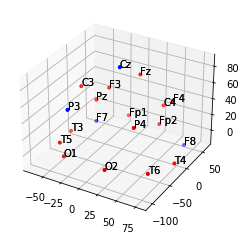

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coords[:,0], coords[:,1], coords[:,2],c=m.to_rgba(colors),s=8, cmap='seismic')
for pt in timestamp0['channels']:
        x, y, _ = proj3d.proj_transform(channel_dict[pt][0], channel_dict[pt][1], 
                                        channel_dict[pt][2], ax.get_proj())
        ax.annotate(pt, xy=(x,y), fontsize=10)

In [100]:
plot_df4=plot_df3.copy()
loca_listx = []
loca_listy = []
loca_listz = []
for index, row in plot_df4.iterrows():
    loca_listx.append(channel_dict[row['channels']][0])
    loca_listy.append(channel_dict[row['channels']][1])
    loca_listz.append(channel_dict[row['channels']][2])
plot_df4['chan_locax'] = loca_listx
plot_df4['chan_locay'] = loca_listy
plot_df4['chan_locaz'] = loca_listz
plot_df4

time channels     signal  chan_locax  chan_locay  chan_locaz
0             0      Fp1   5.249967  -21.908407   63.626633   -5.284244
1             0      Fp1   5.278089  -21.908407   63.626633   -5.284244
2             1      Fp1  -0.704738  -21.908407   63.626633   -5.284244
3             1      Fp1  -0.677084  -21.908407   63.626633   -5.284244
4             2      Fp1  -0.871208  -21.908407   63.626633   -5.284244
...         ...      ...        ...         ...         ...         ...
199592901    48       O2  -0.308114   28.388458 -105.947169    8.324236
199592902    49       O2  -5.578065   28.388458 -105.947169    8.324236
199592903    49       O2 -19.382553   28.388458 -105.947169    8.324236
199592904    50       O2 -23.613045   28.388458 -105.947169    8.324236
199592905    50       O2 -18.228041   28.388458 -105.947169    8.324236

[1976 rows x 6 columns]

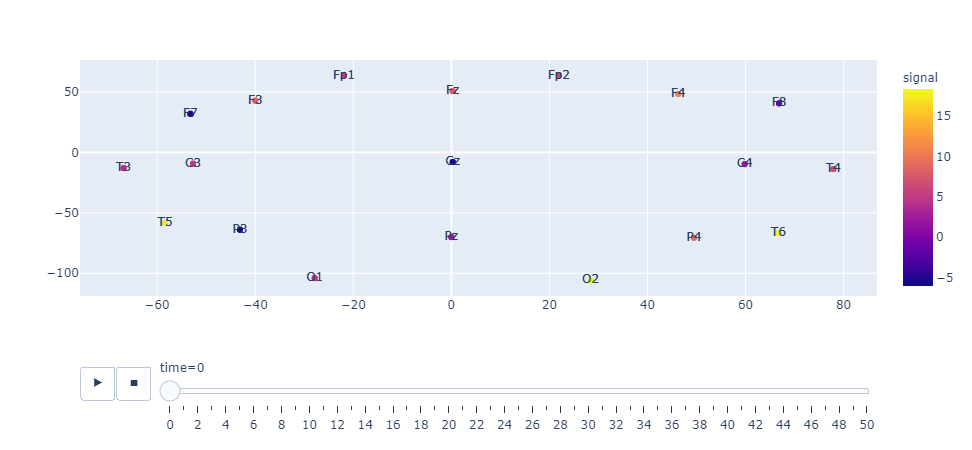

In [113]:
plotly_plot = px.scatter(plot_df4, x="chan_locax", y="chan_locay", animation_frame="time", hover_name="channels", text="channels",
           color="signal", size_max=55, labels={"chan_locax": "", "chan_locay": ""},)
plotly_plot

In [117]:
# plotly_plot2 = go.Scatter3d(plot_df4, x="chan_locax", y="chan_locay", z="chan_locaz", animation_frame="time", hover_name="channels", text="channels",
#            color="signal", size_max=55)
# plotly_plot2

In [84]:
    def update_graph(tp):
        now = plot_df3[plot_df3['time'] == tp]
        ax.cla()
        coords = np.array([channel_dict[chan] for chan in now['channels']])
        colors = [sig for sig in now['signal']]
        graph = ax.scatter(coords[:,0], coords[:,1], coords[:,2], c=m.to_rgba(colors),
                       s=40, cmap='seismic')
        graph.set_clim(min(plot_df3['signal']), max(plot_df3['signal']))
        for pt in now['channels']:
            x, y, _ = proj3d.proj_transform(channel_dict[pt][0], channel_dict[pt][1], 
                                        channel_dict[pt][2], ax.get_proj())
            ax.annotate(pt, xy=(x,y), fontsize=12)
        ax.set_title('time={}'.format(tp))
        return graph

In [85]:
ani = matplotlib.animation.FuncAnimation(fig, update_graph, max(plot_df3['time']))

In [86]:
HTML(ani.to_jshtml())

In [36]:
 def update_graph2(tp):
        now = plot_df3[plot_df3['time'] == tp]
        coords = np.array([channel_dict[chan] for chan in now['channels']])
        colors = [sig for sig in now['signal']]
        graph = plt.scatter(coords[:,0], coords[:,1], c=m.to_rgba(colors),
                       s=8)
        graph.set_clim(min(plot_df3['signal']), max(plot_df3['signal']))
        for pt in now['channels']:
            x, y = channel_dict[pt][0], channel_dict[pt][1], 
            ax.annotate(pt, xy=(x,y), fontsize=12)
        ax.set_title('time={}'.format(tp))
        return graph

In [37]:
ani2 = matplotlib.animation.FuncAnimation(fig2, update_graph2, max(plot_df3['time']))

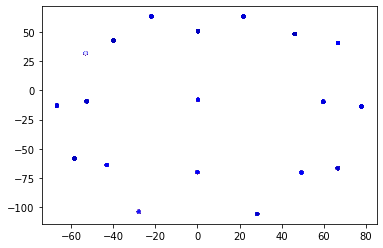

In [38]:
HTML(ani2.to_jshtml())

In [73]:
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

In [71]:
# these will be equivalent:
# raw_1020 = raw.copy().set_montage(ten_twenty_montage)
raw_1020 = raw.copy().set_montage('standard_1020')

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


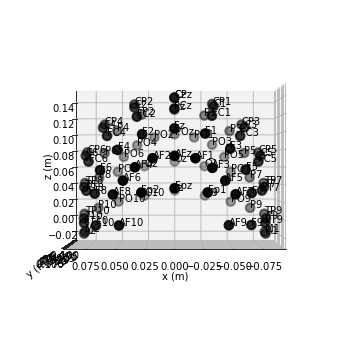

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


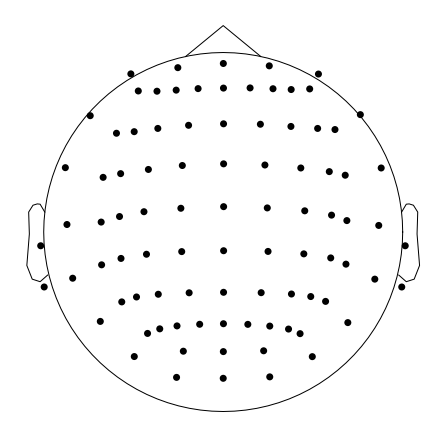

In [75]:
fig = ten_twenty_montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15)
ten_twenty_montage.plot(kind='topomap', show_names=False);

In [ ]:
# def animate(data, channel_map_dict, animation_name='animation'):

#     n = mpl.colors.SymLogNorm(linthresh=1, linscale=1, 
#                               vmin=min(data['signal']), vmax=max(data['signal']))
#     m = mpl.cm.ScalarMappable(norm=n, cmap='seismic')

#     def update_graph(tp):
#         now = data[data['time'] == tp]
#         ax.cla()
#         coords = np.array([channel_map_dict[chan] for chan in now['channels']])
#         colors = [sig for sig in now['signal']]
#         graph = ax.scatter(coords[:,0], coords[:,1], coords[:,2], c=m.to_rgba(colors),
#                        s=8, cmap='seismic')
#         graph.set_clim(min(data['signal']), max(data['signal']))
#         for pt in now['channels']:
#             x, y, _ = proj3d.proj_transform(channel_map_dict[pt][0], channel_map_dict[pt][1], 
#                                         channel_map_dict[pt][2], ax.get_proj())
#             ax.annotate(pt, xy=(x,y), fontsize=6)
#         ax.set_title('time={}'.format(tp))
#         return graph


#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     title = ax.set_title('3D Test')

#     now = data[data['time'] == 0]
#     coords = np.array([channel_map_dict[chan] for chan in now['channels']])
#     colors = [sig for sig in now['signal']]

#     graph = ax.scatter(coords[:,0], coords[:,1], coords[:,2], c=m.to_rgba(colors),
#                        s=8, cmap='seismic')
        
#     graph.set_clim(min(data['signals']), max(data['signals']))
#     for pt in now['channels']:
#         x, y, _ = proj3d.proj_transform(channel_map_dict[pt][0], channel_map_dict[pt][1], 
#                                         channel_map_dict[pt][2], ax.get_proj())
#         ax.annotate(pt, xy=(x,y), fontsize=6)

#     ani = matplotlib.animation.FuncAnimation(fig, update_graph, max(data['time']), 
#                                    interval=50, blit=False)
#     ani.save(animation_name+'.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

#     plt.show()

In [ ]:
# import numpy as np
# import plotly.graph_objects as go

# x,y,z = np.genfromtxt(r'dat.txt', unpack=True)


# # Create figure
# fig = go.Figure(
#     data=[go.Scatter3d(x=[], y=[], z=[],
#                      mode="markers",marker=dict(color="red", size=10))])
    
# fig.update_layout(
        
#          scene = dict(
        
#         xaxis=dict(range=[min(x), max(x)], autorange=False),
#         yaxis=dict(range=[min(y), max(y)], autorange=False),
#         zaxis=dict(range=[min(z), max(z)], autorange=False),
#         )),


# frames = [go.Frame(data= [go.Scatter3d(
#                                        x=x[[k]], 
#                                        y=y[[k]],
#                                        z=z[[k]])],
                   
#                    traces= [0],
#                    name=f'frame{k}'      
#                   )for k  in  range(len(x))]
# fig.update(frames=frames),




# fig.update_layout(updatemenus=[dict(type="buttons",
#                           buttons=[dict(label="Play",
#                                         method="animate",
#                                         args=[None, dict(frame=dict(redraw=True,fromcurrent=True, mode='immediate'))      ])])])


# fig.show()
